In [1]:
%reset -f
import numpy as np
import time
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

In [2]:
d = np.loadtxt('data1000.txt')
print(d.shape)
print(d)

(508, 1000)
[[3.9109366e+04 4.4807198e+04 3.4937566e+04 ... 8.7210820e+04
  8.9752334e+04 5.6742021e+04]
 [3.1062793e-01 2.9816743e-01 3.0475226e-01 ... 2.9333598e-01
  2.9709712e-01 2.9218382e-01]
 [1.2305831e-01 1.2890564e-01 1.1906042e-01 ... 1.1926085e-01
  1.1351692e-01 1.2509022e-01]
 ...
 [1.9002720e+01 1.9669765e+01 1.4601104e+01 ... 2.1828421e+01
  2.6109394e+01 2.1814933e+01]
 [1.9859154e+01 2.0049529e+01 1.4856846e+01 ... 2.2094261e+01
  2.6323599e+01 2.2099352e+01]
 [2.0351126e+01 2.0396294e+01 1.5086969e+01 ... 2.2351606e+01
  2.6528366e+01 1.1712700e+01]]


In [3]:
X_train = d[0:8,0:900]
y_train = d[8:509,0:900]

X_val =d[0:8,900:]
y_val = d[8:509,900:]

X_train = X_train.T
print('shape of X_train:', X_train.shape)

y_train = y_train.T
print('shape of y_train:', y_train.shape)

X_val = X_val.T
print('shape of X_val:', X_val.shape)

y_val = y_val.T
print('shape of y_val:', y_val.shape)

shape of X_train: (900, 8)
shape of y_train: (900, 500)
shape of X_val: (100, 8)
shape of y_val: (100, 500)


In [4]:
#Normalisation (Scaling)
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)

X_train = (X_train-mean)/std
X_val = (X_val-mean)/std

In [5]:
model = models.Sequential()

# No choice for the input dimension, it must be 8 because of 8 parameters
model.add(layers.Dense(128,activation = 'relu',input_dim = 8))
model.add(layers.Dense(128,activation = 'relu', kernel_initializer = "uniform"))
# model
"""
liste_unit = [128,128,128,128,128,64,64,64,64,64]
unit = np.random.choice(liste_unit)
for i in range(10):
    model.add(layers.Dense(liste_unit[i],activation = 'relu', kernel_initializer = "uniform"))
"""
model.add(layers.Dense(500, kernel_initializer = "uniform"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 500)               64500     
Total params: 82,164
Trainable params: 82,164
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Train
model.compile(optimizer = 'adam', loss = 'mse',metrics =  ['mse'])
hist = model.fit(X_train,y_train,epochs = 130, batch_size = 32,validation_data =(X_val,y_val))
print(hist.history.keys())

Epoch 1/130
29/29 [==============================] - 1s 34ms/step - loss: 545.6353 - mse: 545.6353 - val_loss: 477.9379 - val_mse: 477.9379
Epoch 2/130
29/29 [==============================] - 1s 17ms/step - loss: 399.4333 - mse: 399.4333 - val_loss: 169.3991 - val_mse: 169.3991
Epoch 3/130
29/29 [==============================] - 0s 8ms/step - loss: 142.8214 - mse: 142.8214 - val_loss: 112.0854 - val_mse: 112.0854
Epoch 4/130
29/29 [==============================] - 0s 7ms/step - loss: 109.8404 - mse: 109.8404 - val_loss: 110.2470 - val_mse: 110.2470
Epoch 5/130
29/29 [==============================] - 0s 8ms/step - loss: 105.4929 - mse: 105.4929 - val_loss: 109.3248 - val_mse: 109.3248
Epoch 6/130
29/29 [==============================] - 0s 6ms/step - loss: 107.5477 - mse: 107.5477 - val_loss: 108.1197 - val_mse: 108.1197
Epoch 7/130
29/29 [==============================] - 0s 6ms/step - loss: 106.2566 - mse: 106.2566 - val_loss: 106.7026 - val_mse: 106.7026
Epoch 8/130
29/29 [======

Epoch 61/130
29/29 [==============================] - 0s 6ms/step - loss: 55.2182 - mse: 55.2182 - val_loss: 54.2372 - val_mse: 54.2372
Epoch 62/130
29/29 [==============================] - 0s 9ms/step - loss: 54.9410 - mse: 54.9410 - val_loss: 53.5085 - val_mse: 53.5085
Epoch 63/130
29/29 [==============================] - 0s 9ms/step - loss: 53.8173 - mse: 53.8173 - val_loss: 52.8436 - val_mse: 52.8436
Epoch 64/130
29/29 [==============================] - 0s 4ms/step - loss: 53.7941 - mse: 53.7941 - val_loss: 52.4072 - val_mse: 52.4072
Epoch 65/130
29/29 [==============================] - 0s 4ms/step - loss: 53.2796 - mse: 53.2796 - val_loss: 51.9628 - val_mse: 51.9628
Epoch 66/130
29/29 [==============================] - 0s 7ms/step - loss: 52.4369 - mse: 52.4369 - val_loss: 51.4213 - val_mse: 51.4213
Epoch 67/130
29/29 [==============================] - 0s 7ms/step - loss: 52.3092 - mse: 52.3092 - val_loss: 51.0809 - val_mse: 51.0809
Epoch 68/130
29/29 [============================

Epoch 121/130
29/29 [==============================] - 0s 5ms/step - loss: 41.1005 - mse: 41.1005 - val_loss: 41.6942 - val_mse: 41.6942
Epoch 122/130
29/29 [==============================] - 0s 6ms/step - loss: 40.8050 - mse: 40.8050 - val_loss: 41.6985 - val_mse: 41.6985
Epoch 123/130
29/29 [==============================] - 0s 4ms/step - loss: 41.0386 - mse: 41.0386 - val_loss: 41.6652 - val_mse: 41.6652
Epoch 124/130
29/29 [==============================] - 0s 10ms/step - loss: 40.7585 - mse: 40.7585 - val_loss: 41.4569 - val_mse: 41.4569
Epoch 125/130
29/29 [==============================] - 0s 8ms/step - loss: 40.4577 - mse: 40.4577 - val_loss: 41.3322 - val_mse: 41.3322
Epoch 126/130
29/29 [==============================] - 0s 16ms/step - loss: 40.3992 - mse: 40.3992 - val_loss: 41.3143 - val_mse: 41.3143
Epoch 127/130
29/29 [==============================] - 0s 8ms/step - loss: 40.0605 - mse: 40.0605 - val_loss: 41.0683 - val_mse: 41.0683
Epoch 128/130
29/29 [==================

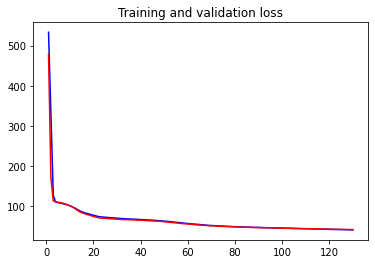

In [7]:
train_loss = hist.history['loss']
valid_loss = hist.history['val_loss']
ep = range(1, len(train_loss)+1)
plt.figure()
plt.plot(ep,train_loss,'b-')
plt.plot(ep,valid_loss,'r-')
plt.title('Training and validation loss')
plt.show()

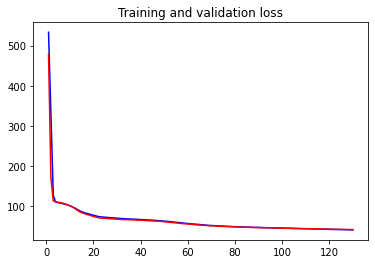

In [8]:
train_acc = hist.history['mse']
valid_acc = hist.history['val_mse']
ep = range(1, len(train_loss)+1)
plt.figure()
plt.plot(ep,train_acc,'b-')
plt.plot(ep,valid_acc,'r-')
plt.title('Training and validation loss')
plt.show()

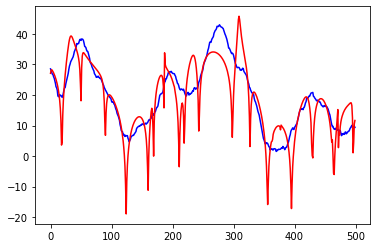

In [9]:
#make prediction with the model and plot the solution by the model
y_pred = model.predict(X_val)
plt.plot(y_pred[0,:],'b-')
plt.plot(y_val[0,:],'r-')